<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
import requests

df = pd.read_csv('data/job_listings.csv')

def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()

df['clean_desc'] = df['description'].apply(clean_description)

In [19]:
df['clean_desc']

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
                             ...                        
421    b"About Us:\nWant to be part of a fantastic an...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    b"SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...
425    b'Cerner Intelligence is a new, innovative org...
Name: clean_desc, Length: 426, dtype: object

In [5]:
nlp = spacy.load("en_core_web_lg")


## 2) Use Spacy to tokenize the listings 

In [12]:
STOP_WORDS = nlp.Defaults.stop_words.union(['b', 'job', 'apply', ' ', '-'])

In [24]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [ ]:
doc = []
for desc in df['clean_desc']:
    
    data= nlp(desc)


    tokens = []
    for token in data:
        if ((token.text.lower() not in STOP_WORDS) and (token.text.isalpha() == True) and (token.pos_ != 'PRON')):
            tokens.append(token.text.lower().strip('\\'))
    doc.append(tokens)
doc  

In [29]:
df['tokens']=doc
df.head()

,Unnamed: 0,description,title,clean_desc,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[understanding, machine, learning, models, lik..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[data, scientist, help, build, machine, learni..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[data, scientist, working, consulting, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[monthcontractunder, general, supervision, pro..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[usa, multiple, years, analytics, business, re..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [20]:
vect = CountVectorizer(stop_words='english', max_features=1000)

vect.fit(df['clean_desc'])

dtm = vect.transform(df['clean_desc'])

dwc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dwc

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,4,0,2,3,1
422,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
423,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
424,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,1,0


## 4) Visualize the most common word counts

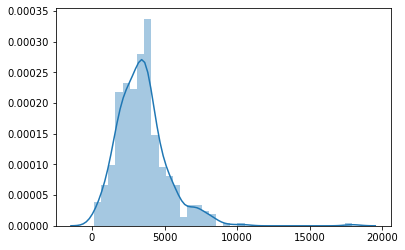

In [21]:
import seaborn as sns

doc_len = [len(doc) for doc in df['clean_desc']]

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [23]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

ttm = tfidf.fit_transform(df['clean_desc'])

ttm = pd.DataFrame(ttm.todense(), columns=tfidf.get_feature_names())

ttm.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [31]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(ttm)


NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [32]:
ideal_description = [""" Business analyst position for a recently educated data scientist with an education
in business administration. 40 hours a week with optional overtime and 2 weeks annual paid holidays starting
annual salary of 70,000 USD. Required to complete analytic tasks using data science methods on schedule and
assist with visualizations for presentations on the subject. Perform quarterly analysis on desired metrics 
and deliver findings to supervisor for quarterly meeting."""]

In [34]:
ideal = tfidf.transform(ideal_description)

for item in nn.kneighbors(ideal.todense())[1][0]:
    print(df['clean_desc'][item], '\n')

b'$70,000 - $100,000 a yearTitle: Data Analyst/Jr. Data Scientist\nLocations: Charleston, SC\nSalary: $70-100k (dependent upon experience\n\nQualifications:\n\n2+ years of Database Development/Architecture experience (SQL)\nExperience with Data visualization tools such as Tableau (Sisense preferred)\nExpertise in MS Excel\nPreferred:\n\nDegree in Computer Science\nExperience with R and/or Python\nExperience working with Spark\nMachine Learning experience\nA bit about the company:\n\nIn the A.I. space\nGreat company culture/office environment\nAmazing benefits\nIndustry disruptive organization' 

b"POSITION SUMMARY\n\nWe are looking for a passionate, detail-oriented Jr. Data Scientist to join our Data Science team. The successful candidate be responsible for identifying and developing solutions to turn data into actionable business recommendations. You will need to exhibit a strong combination of analytical prowess, technical aptitude and business judgment. You will be expected to focus

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 